<a href="https://colab.research.google.com/github/vvviet2908/DA-ML/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Understanding the data - EDA:

Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

**Feature 'Time'** contains the seconds elapsed between each transaction and the first transaction in the dataset. 

The **Feature 'Amount'** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 

**Feature 'Class'** is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**Source:** https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [13]:
#Load the data
data = pd.read_csv("https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
#finding the shape of dataframe (finding no.of observations and features in the given dataframe)
data.shape

(284807, 31)

=> There are 284,807 observation in the data

In [15]:
#Checking the null value
data.isnull().sum().max()

0

In [16]:
#finding whether it is balanced data or imbalanced data
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

=> From the above info it is clear that it is an imbalanced dataset

In [17]:
print('No Frauds:', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds:', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


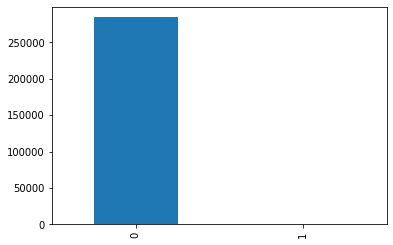

In [18]:
data['Class'].value_counts().plot(kind='bar')

=> Only 492 (or 0.172%) of transaction are fraud. If we use this dataframe as the base for our predictive models we may get a lot of misclassified errors.

**So the aim of this Fraud Detection is maximize the detection of fraudulent transactions, and also minimize the number of false positives**

About the 'Time' and 'Amount' features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


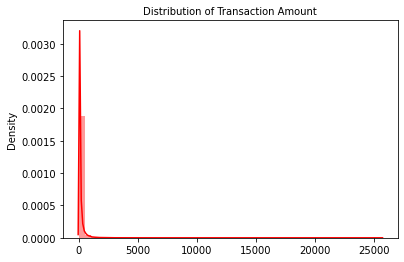

In [19]:
amount_val = data['Amount'].values
sns.distplot(amount_val, color='r').set_title('Distribution of Transaction Amount', fontsize=10)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


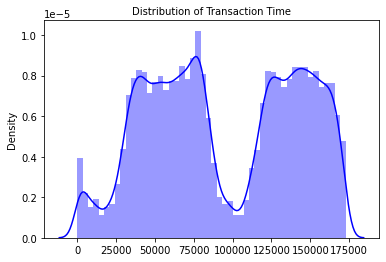

In [20]:
time_val = data['Time'].values
sns.distplot(time_val, color='b').set_title('Distribution of Transaction Time', fontsize=10)
plt.show()

Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)

=> 'Time' and 'Amount' should be scaled as the other columns.

In [21]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

data['scaled_amount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = std_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)


scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Build Model Using Original Data (Imbalanced Data)

For Comparation, we will first use the Imbalanced data to train the model

Here we use Logistic Regression

In [22]:
# Import Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 

#Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report


In [24]:
#Split the data into train and test sets
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)
print(X_train.shape)
print(X_test.shape)

train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-' * 50)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

(227845, 30)
(56962, 30)
--------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


In [25]:
clf = LogisticRegression()    
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
accuracy_score = accuracy_score(y_test, predictions)
recall_score = recall_score(y_test, predictions)
precision_score = precision_score(y_test, predictions)
f1_score = f1_score(y_test, predictions)
print('Logistic Regression Result:')
print('Accuracy Score: ', accuracy_score)
print('Recall: ', recall_score)
print('Precision: ', precision_score)
print('F1 Score:', f1_score) 

Logistic Regression Result:
Accuracy Score:  0.9991222218320986
Recall:  0.5816326530612245
Precision:  0.8636363636363636
F1 Score: 0.6951219512195121


Text(0.5, 15.0, 'Predicted Classes')

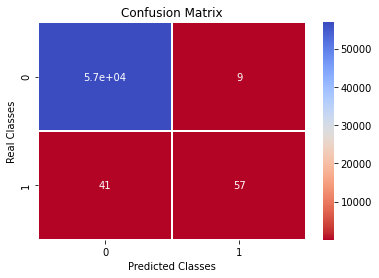

In [28]:
from sklearn.metrics import confusion_matrix
cfn_matrix=confusion_matrix(y_test, predictions)

sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



Trained this Imbalanced Data, although get the high accuracy (up to 99%), but there are bad performance on predict fraudulent

**=> The model must do well on the detection of fraudulent transactions**

## Deal with Imbalanced data 

There are several ways to approach this classification problem taking into consideration this imbalance:


1.   Collect more data? Nice strategy but not applicable in this case
2.  Changing the performance metric:
*   Calculate Precision, Recall, F1-Score
*   ROC curves
3. Resampling the dataset:
Essentially this is a method that will process the data to have an approximate 50-50 ratio:
*   One way to achieve this is by OVER-sampling
*   Another is UNDER-sampling, issue with "Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)